In [173]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.getcwd()
os.chdir('/content/drive/My Drive/FSDP2019_DEEP_LEARNING/Sucide_RATE/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('master.csv')


In [0]:
def gdp_float(x):
  x=x.replace(",","")
  x=float(x)
  return (x)
          
          
          
dataset['gdp_for_year']=dataset[' gdp_for_year ($) '].apply(gdp_float)
#dataset.axes

In [176]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
gdp_for_year          27820 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 2.8+ MB


In [177]:
dataset.ndim
#dataset.shape

2

In [178]:

dataset.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,2.156625e+09
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,2.156625e+09
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,2.156625e+09
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,2.156625e+09
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,2.156625e+09


In [179]:
#dataset.axes
#dataset.values
dataset.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000,2.782000e+04
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414,4.455810e+11
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472,1.453610e+12
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,4.691962e+07
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000,8.985353e+09
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000,4.811469e+10
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000,2.602024e+11
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,1.812071e+13



1. visualize the  number of suicides of both male and females of different
age group for every year from 1986-2016

   & find which age group has the highest number of suside rate.

2. Which country has the highest number of Suside rate visualize it.

3. Which country has highest & Lowest suside rate in 2006 visualize it.

4. apply all classification algorithm and find best results,check the score
and accuracy.then predict for this data

   country ----> Albania

   year ----> 2014

   Sex ----> Male

   Age ----> 24

   Suside no. ----> 22

   population ----> 279800

   country-year ----> 7.11

   gdp_for_year ($)  ---->2,10,56,21,800

   gdp_per_capita ($)  ---->749

   according to data find it was lie on which generation.

5. Which country has the lowest GDP rate in 2014. visualize it.

Dataset: Collect from Forsk team.
"""

In [180]:
dataset['sex'].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [181]:
dataset.groupby('sex')[['age']].sum()

,age
sex,
female,15-24 years75+ years35-54 years25-34 years5-14...
male,15-24 years35-54 years75+ years25-34 years55-7...


In [182]:
dataset.groupby('age')[['age','suicides_no','sex']].sum()

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


In [183]:
df_rank=dataset.groupby(['sex', 'age','suicides_no'])
df_rank.size()
 
#df_rank.groups
#df_rank.groups.keys()

sex     age          suicides_no
female  15-24 years  0              334
                     1              107
                     2               67
                     3               52
                     4               45
                     5               43
                     6               53
                     7               47
                     8               48
                     9               50
                     10              48
                     11              39
                     12              39
                     13              39
                     14              33
                     15              32
                     16              31
                     17              32
                     18              31
                     19              16
                     20              36
                     21              25
                     22              16
                     23              25
       

In [184]:
dataset['suicides/100k pop'].max()

224.97

In [0]:
#dataset.groupby('age').aggregate(['min','max'])

find which age group has the highest number of suside rate.

In [0]:
age=dataset.groupby('age').aggregate({'suicides/100k pop': 'max'})

In [187]:
print(age)

             suicides/100k pop
age                           
15-24 years              85.59
25-34 years              94.18
35-54 years             151.33
5-14 years               18.92
55-74 years             123.83
75+ years               224.97


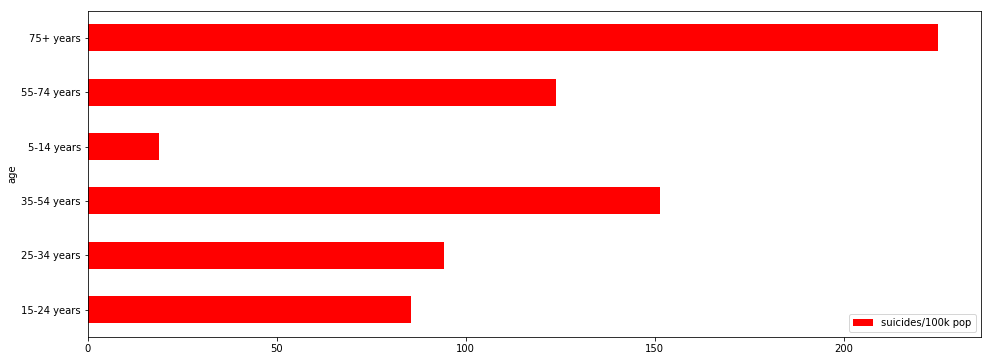

In [188]:
age.plot(kind='barh',figsize=[16,6],colormap='autumn')



Which country has the highest number of Suside rate visualize it.


In [189]:
#cou=dataset.groupby('country').aggregate({'suicides/100k pop': 'max'})
#cou_max = dataset.sort_values('suicides/100k pop')


df_sorted= dataset.sort_values( by='suicides/100k pop', ascending = [False])
df_sorted['suicides/100k pop'][0:5]

1258     224.97
22280    204.92
24332    187.06
20542    185.37
20530    182.32
Name: suicides/100k pop, dtype: float64

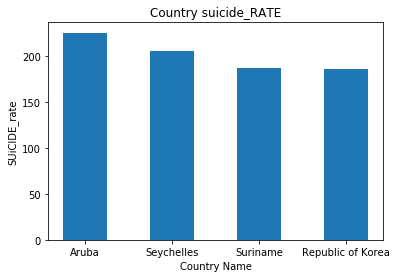

In [190]:

import matplotlib.pyplot as plt

plt.bar(df_sorted['country'][0:5],df_sorted['suicides/100k pop'][0:5], width = 0.5, align='center', alpha=1.0,)
plt.xlabel('Country Name')
plt.ylabel('SUiCIDE_rate')

plt.title('Country suicide_RATE')
 
plt.show()

Which country has highest & Lowest suside rate in 2006 visualize it.

In [0]:
cou_min = dataset[(dataset['year']==2006)].sort_values('suicides/100k pop').min()
cou_max = dataset[(dataset['year']==2006)].sort_values('suicides/100k pop').max()

In [192]:
cou_min
cou_max
#cou_max['country'][50:].unique()

country                       Uruguay
year                             2006
sex                              male
age                         75+ years
suicides_no                     14020
population                   43805214
suicides/100k pop              204.92
country-year              Uruguay2006
HDI for year                     None
 gdp_for_year ($)     989,930,542,279
gdp_per_capita ($)              95351
generation                     Silent
gdp_for_year              1.38559e+13
dtype: object

Which country has the lowest GDP rate in 2014. visualize it.

In [0]:


cou_min = dataset[(dataset['year']==2014)].sort_values('gdp_for_year')

#cou_max = dataset[(dataset['year']==2006)].sort_values(' gdp_for_year ($) ').max()

In [0]:
cou_min['gdp_for_year'][0:25].unique()
cou_min['country'][0:25].unique()

cou_min.iloc[:4,[0,-1]].values

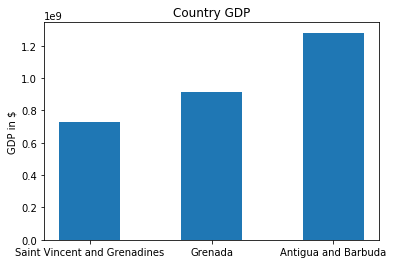

In [195]:

import matplotlib.pyplot as plt

plt.bar(cou_min['country'][0:25].unique(),cou_min['gdp_for_year'][0:25].unique(), width = 0.5, align='center', alpha=1.0,)
plt.ylabel('Country Name')
plt.ylabel('GDP in $')

plt.title('Country GDP')
 
plt.show()


apply all classification algorithm and find best results,check the score and accuracy.then predict for this data

country ----> Albania

year ----> 2014

Sex ----> Male

Age ----> 24

Suside no. ----> 22

population ----> 279800

country-year ----> 7.11

gdp_for_year ($) ---->2,10,56,21,800

gdp_per_capita ($) ---->749

according to data find it was lie on which generation.


In [196]:
dataset.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,2.156625e+09
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,2.156625e+09
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,2.156625e+09
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,2.156625e+09
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,2.156625e+09
